Shape: (45211, 17)

Columns:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Class distribution:
 y
no     39922
yes     5289
Name: count, dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Numerical Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


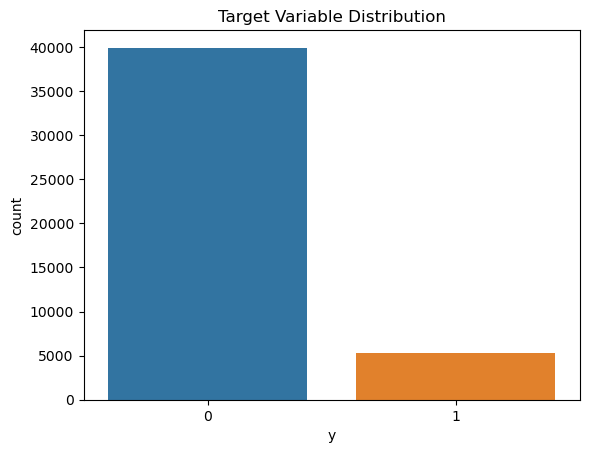

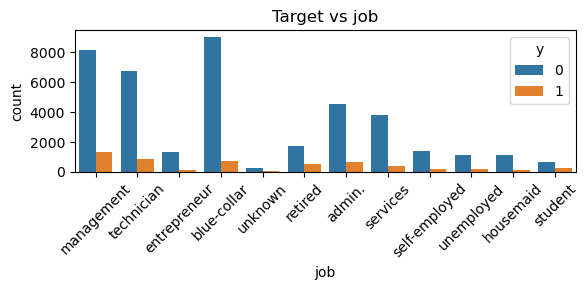

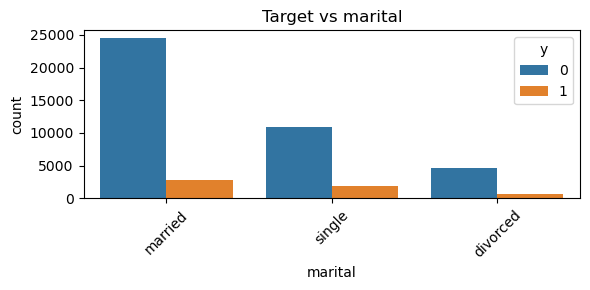

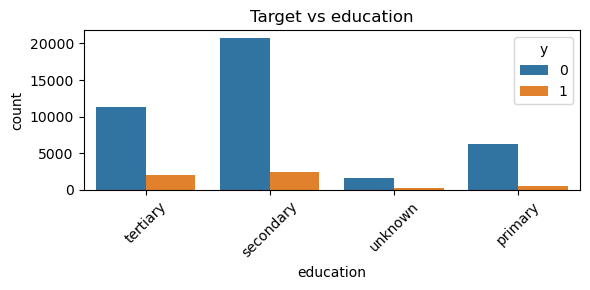

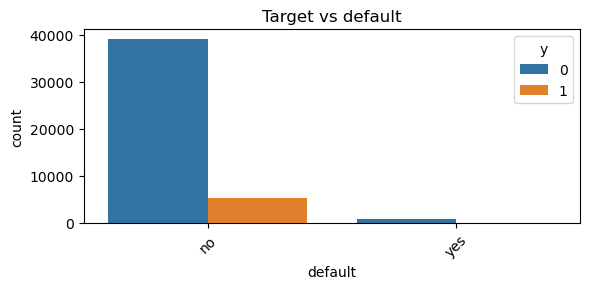

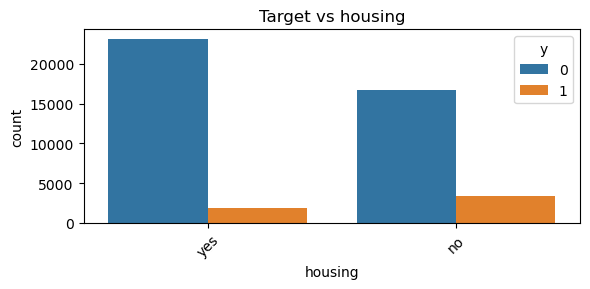

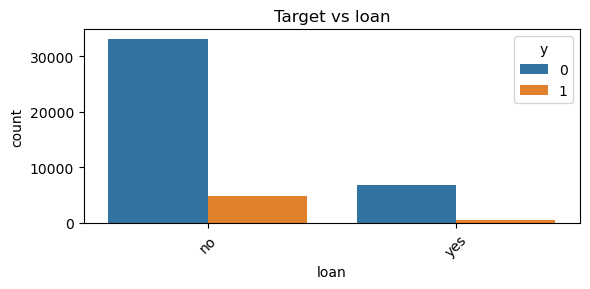

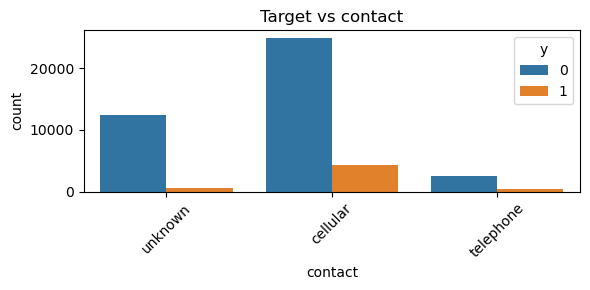

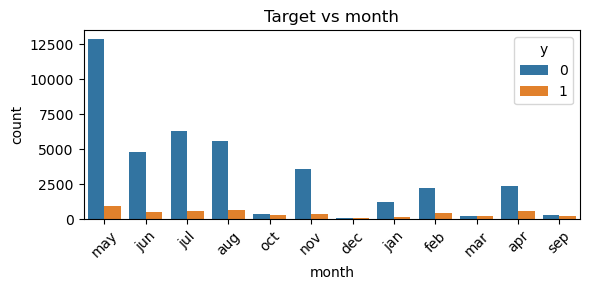

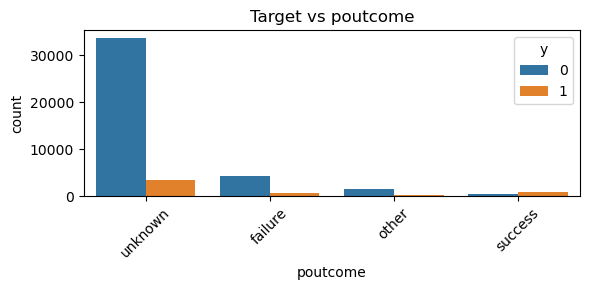


Encoded Data Preview:



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [4]:
# EDA + Preprocessing Starter Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"D:\marketing-campaign-optimizer\data\bank\bank-full.csv")  # Update path if needed

# Basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['y'].value_counts())

# Preview data
display(df.head())

# Convert target to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Identify categorical + numerical
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=np.number).columns.tolist()

print("\nCategorical Columns:", categorical)
print("\nNumerical Columns:", numerical)

# --- Visualization ---
# Target variable distribution
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.show()

# Categorical variable impact
for col in categorical:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f"Target vs {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Correlation heatmap
# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
# plt.title("Correlation Heatmap")
# plt.show()

# --- Basic Preprocessing ---
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Final processed data
print("\nEncoded Data Preview:\n")
display(df_encoded.head())

# Save processed version
df_encoded.to_csv(r"D:\marketing-campaign-optimizer\data\processed_marketing.csv", index=False)
